<a href="https://colab.research.google.com/github/rajkumarpec/Supervised-Learning-Classification-/blob/main/Health_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <b><u> Project Title : Predict whether a customer would be interested in Vehicle Insurance </u></b>

##### **Project Type**    - Supervised Learning(Classification)
##### **Contribution**    - Individual
##### **Created by**        - Dr. Raj Kumar

## **GitHub Link -**

 **GitHub Link: **

## **Project Summary**

* The goal of data science is **to construct the means for extracting business-focused insights** from data. This requires an understanding of how value and information flows in a business, and the ability to use that understanding to identify business opportunities.

* Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

* An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

* For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.


## **Business context**

Like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer. An isurance company want to build a model to predict whether a customer would be interested in Vehicle Insurance. So, company makes communication strategy to reach out to those customers and optimise its business model and revenue.

## **Problem Statements**

Insurance is an agreement by which an individual obtains protection against any losses from an insurance company against the risks of damage, financial losses, damage, illness, or death in return for the payment of a specified premium. In this project, we have an insurance details dataset which contains a **total of 381109 rows and 12 features**. you have a categorical dependent variable **Response** which represents whether a customer is interested in vehicle insurance or not. Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

## ***Let's Begin !***

## ***1. Data Understanding***

In [ ]:
# import google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import pandas as pd
import numpy as np

# Importing Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score


# Importing warning for ignore warnings 
import warnings
warnings.filterwarnings("ignore")


### Dataset Loading

In [ ]:
# Read dataset
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/3-Supervised ML-Classification/10-Health insurance cross sell prediction/data.csv')

In [ ]:
# Let's see how the dataset looks like
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


## Dataset Information

In [ ]:
# dataset rows & columns counts
 
print('Number of rows {} \n Number of columns {}'.format(df.shape[0],df.shape[1]))

Number of rows 381109 
 Number of columns 12


## Missing values/Null values

In [ ]:
df.isna().sum().sort_values(ascending= False).reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,id,0
1,Gender,0
2,Age,0
3,Driving_License,0
4,Region_Code,0
5,Previously_Insured,0
6,Vehicle_Age,0
7,Vehicle_Damage,0
8,Annual_Premium,0
9,Policy_Sales_Channel,0


In [ ]:
#checking duplicate values
print(len(df[df.duplicated()]))

0


In [ ]:
# Describe the dataset 
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,381109.0,NaN,NaN,NaN,190555.0,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Gender,381109,2,Male,206089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,381109.0,NaN,NaN,NaN,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,NaN,NaN,NaN,0.997869,0.04611,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,NaN,NaN,NaN,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,NaN,NaN,NaN,0.45821,0.498251,0.0,0.0,0.0,1.0,1.0
Vehicle_Age,381109,3,1-2 Year,200316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Damage,381109,2,Yes,192413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Premium,381109.0,NaN,NaN,NaN,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,NaN,NaN,NaN,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0


In [ ]:
# fetch basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


## **2. Understanding your variables**

In [ ]:
# fetch attribute
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

## Attribute Description

* **id :** Unique ID for the customer

* **Gender :** Gender of the customer

* **Age :** Age of the customer

* **Driving_License :** 0 = Customer does not have DL, 1 = Customer already has DL

* **Region_Code :** Unique code for the region of the customer

* **Previously_Insured :** 1 = Customer already has Vehicle Insurance, 0 = Customer doesn't have Vehicle Insurance

* **Vehicle_Age :** Age of the Vehicle

* **Vehicle_Damage :** 1 = Customer got his/her vehicle damaged in the past. 0 = Customer didn't get his/her vehicle damaged in the past.

* **Annual_Premium  :** The amount customer needs to pay as premium in the year

* **Policy Sales Channel :** Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

* **Vintage :** Number of Days, Customer has been associated with the company

* **Response :** 1 : Customer is interested, 0 : Customer is not interested

In [ ]:
#checking unique values
df.nunique().reset_index().rename(columns={'index':'Columns',0:'Unique values'})

,Columns,Unique values
0,id,381109
1,Gender,2
2,Age,66
3,Driving_License,2
4,Region_Code,53
5,Previously_Insured,2
6,Vehicle_Age,3
7,Vehicle_Damage,2
8,Annual_Premium,48838
9,Policy_Sales_Channel,155


## What did you know about your dataset?

* >The dataset cointains customer and their vehicles information of a vehicles insurance company, and our aim to Predict whether a customer would be interested in Vehicle Insurance.
* >There are not any null and duplicate value in the dataset.
* >Dataset has 381109 entries with 12 features.
* >Out of 12 features, 9 are numeric while 3 are of object type.


## **3. Data Wrangling**

* **Data wrangling** (Also known as **data munging**) is the practice of cleansing, restructuring, and enriching raw data. This process is very critical for businesses to perform because it is the only method that makes raw data usable. 
* Raw data is complex because it has not been processed or integrated into a system. With data wrangling, these records are transformed into a standard format that helps highlight valuable insights. The process entails consolidating data into one location and rectifying any missing information or errors.

, 

## Droping and renaming the features:

In [ ]:
# drop Id columns 
df.drop('id',inplace=True,axis=1)

## Extract categoricals and Numerical columns

In [ ]:
# make a function to extract categorical and numerical columns
def extract_cat_num(df):
  cat_col=[col for col in df.columns if df[col].dtype=='object']
  num_col=[col for col in df.columns if df[col].dtype!='object']
  return cat_col,num_col

In [ ]:
cat_col,num_col=extract_cat_num(df)

In [ ]:
# fetch categorical columns
cat_col

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [ ]:
# fetch numerical columns 
num_col

['Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

In [ ]:
# fetch unique value in categorical feature columns

for col in cat_col:
  print('{} has {} values'.format(col,df[col].unique()))
  print('\n')

Gender has ['Male' 'Female'] values


Vehicle_Age has ['> 2 Years' '1-2 Year' '< 1 Year'] values


Vehicle_Damage has ['Yes' 'No'] values




# Visualization of Numeric columns

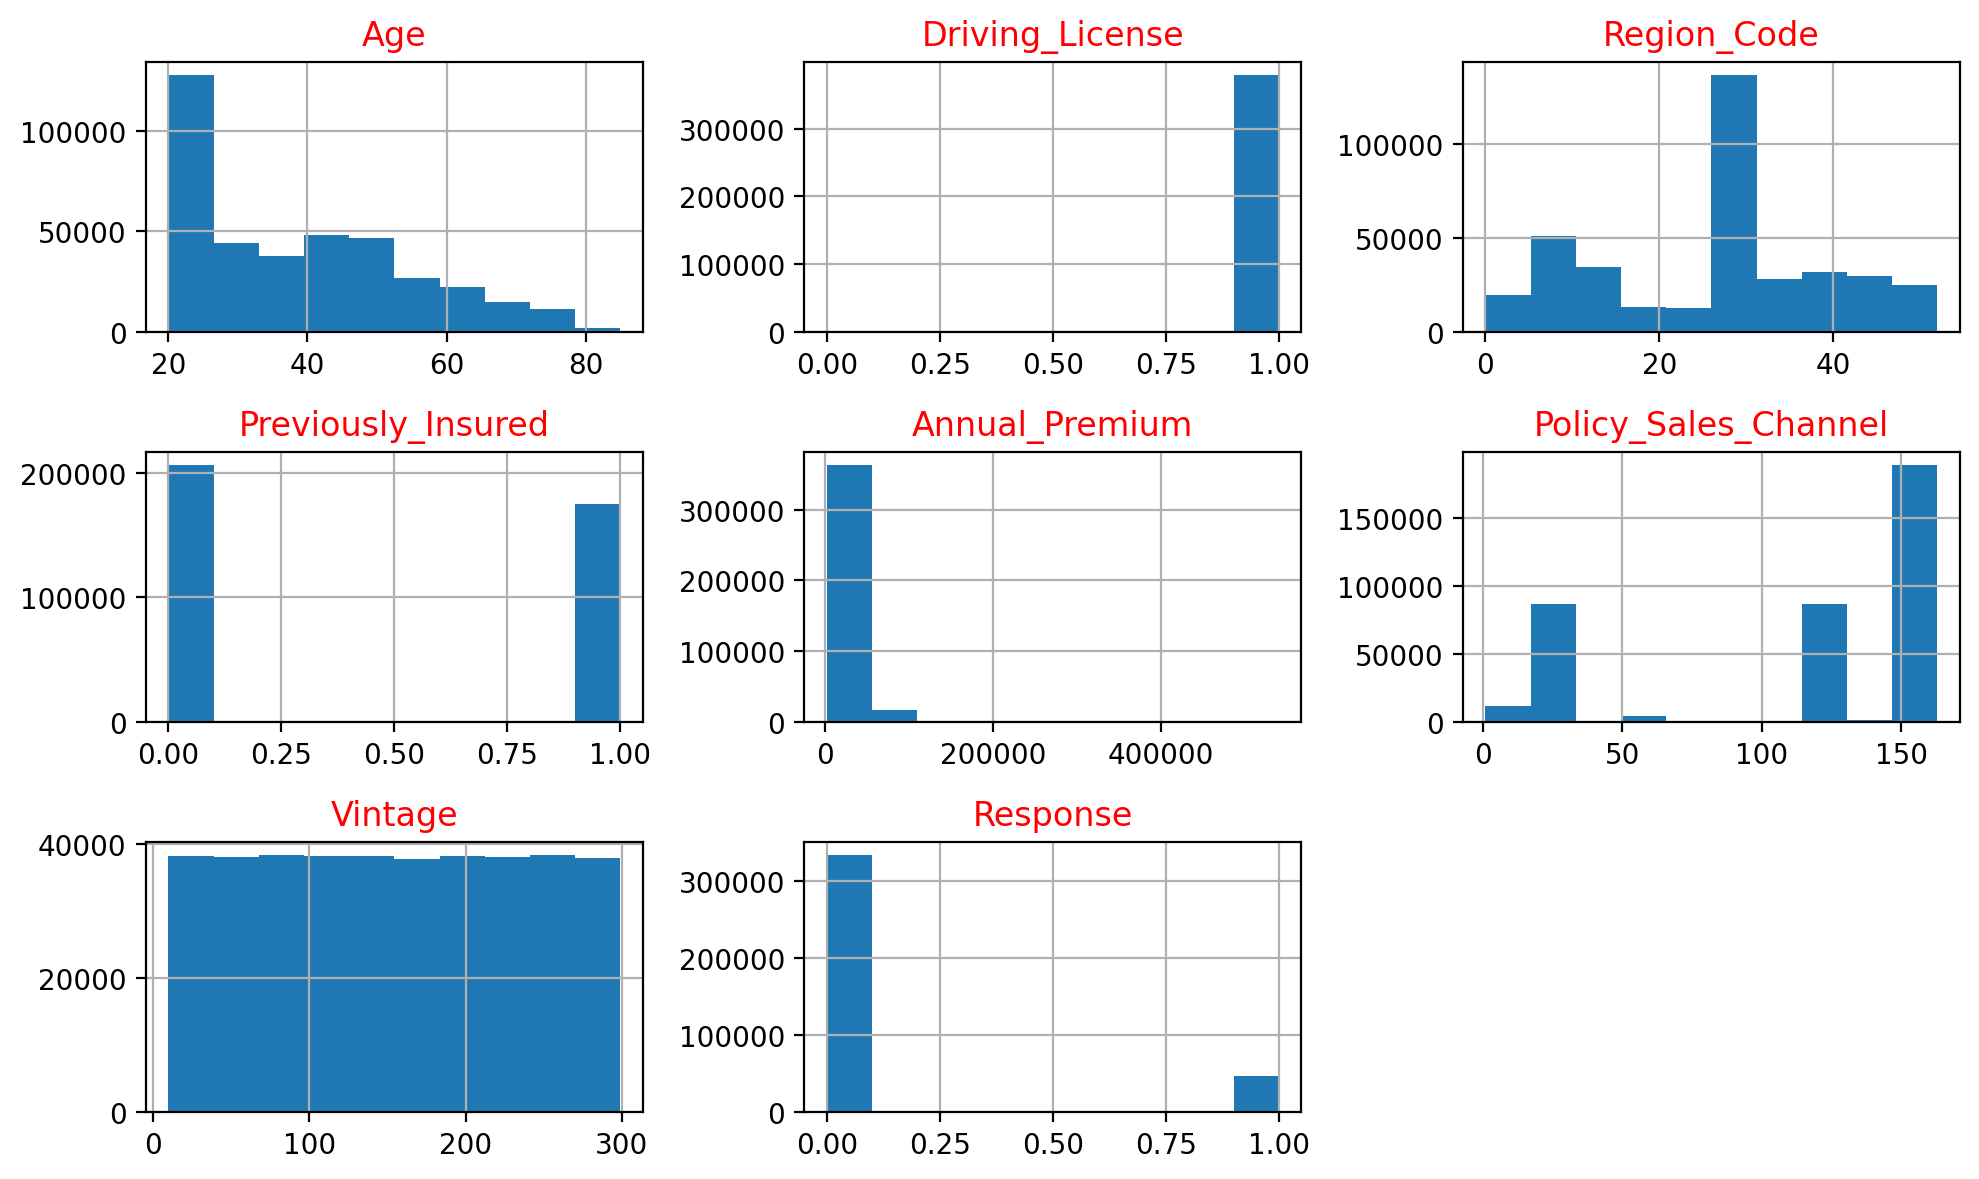

In [ ]:
plt.figure(figsize=(10,6),dpi=200)

for i,feature in enumerate(num_col):
  plt.subplot(3,3,i+1)
  df[feature].hist()
  plt.title(feature, fontsize=12,color='red')
  plt.tight_layout()

## Visualize categorical columns

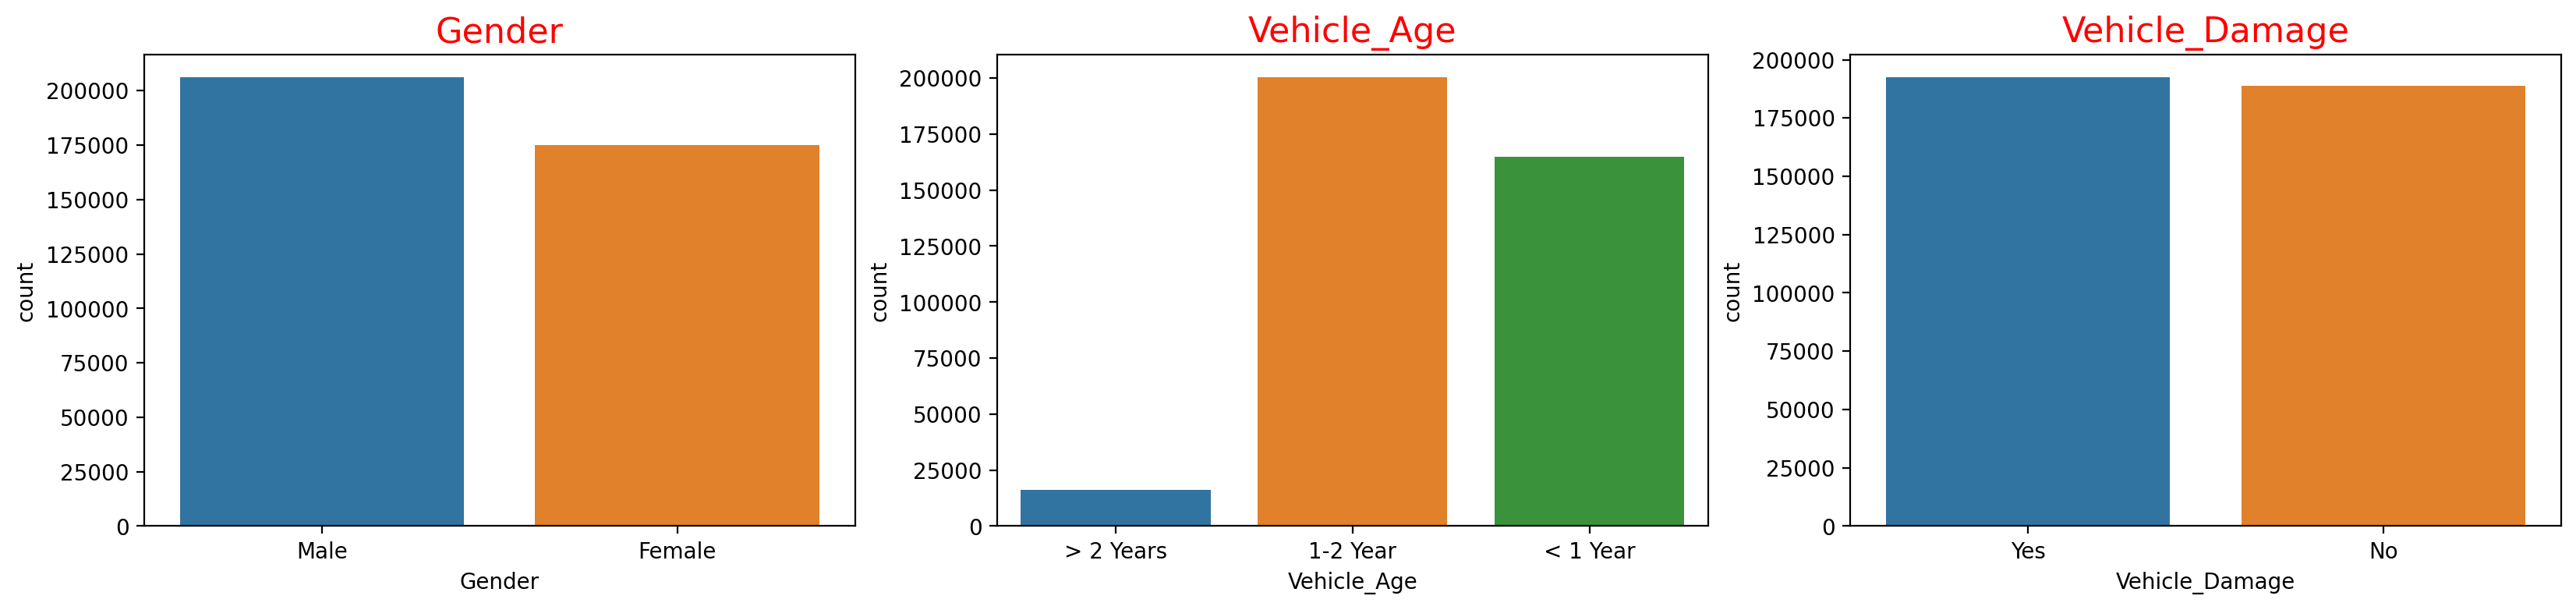

In [ ]:
plt.figure(figsize=(20,4),dpi=200)

for i,feature in enumerate(cat_col):
  plt.subplot(1,3,i+1)
  sns.countplot(x=df[feature])
  plt.title(feature,fontsize=16,color='red')

## Convert columns to appropriate datatypes:

In [ ]:
#changing categorical value to numerical values

# from sklearn.preprocessing import LabelEncoder 

# labelEncoder= LabelEncoder()
# df['Gender'] = labelEncoder.fit_transform(df['Gender'])
# df['Vehicle_Age'] = labelEncoder.fit_transform(df['Vehicle_Age'])
# df['Vehicle_Damage'] = labelEncoder.fit_transform(df['Vehicle_Damage'])

In [ ]:
df.dtypes

Gender                  object
Age                      int64
Driving_License          int64
Region_Code              int64
Previously_Insured       int64
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Vintage                  int64
Response                 int64
dtype: object

In [ ]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


## What all manipulations have you done and insights you found?

* >Dropped the id column
* >All attributes don't have any discrepancy, so no need to correct any attribute column.
* >Categorical columns are: Gender, Vehicle_Age, Vehicle_Damage 
* >Numerical columns are: Age, driving_License, Response Previously_InsuredRegion_Code, Annual_Premium, Policy_Sales_Channel, Vintage
* >Response attribute is our Output 

## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

## **Chart - 1 - Pie Chart on Dependant Variable i.e., Response (Univariate):**

0    334399
1     46710
Name: Response, dtype: int64

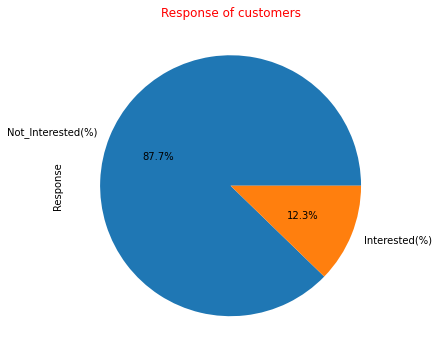

In [ ]:
# Dependant Variable Column Visualization
df['Response'].value_counts().plot(kind='pie',figsize=(15,6), autopct="%1.1f%%",shadow=False,labels=['Not_Interested(%)','Interested(%)'])
plt.title('Response of customers',color='red');

# count of Target variable
df['Response'].value_counts()

## 1. Why did you pick the specific chart?

* A pie chart is a useful tool to display the distribution of various categories in a dataset. By dividing the circle into proportional sections, each representing a different category, the pie chart allows for a clear comparison of the relative size of each category. The use of different colors for each section further enhances the clarity of the representation and makes it easier to understand and interpret the data.

## 2. What is/are the insight(s) found from the chart?

* The data shows that a large majority (87.7%) of customers are not interested, while a smaller portion (12.3%) are interested. The response variable is imbalanced with more instances of "not interested" than "interested".

## 3. Will the gained insights help creating a positive business impact? 

* It depends on the specific business scenario and the insights that were gained from the pie chart. The pie chart provides information on the proportion of different categories in a dataset, but it is up to the business to use that information in a meaningful way to drive positive impact. 
* For example, if the pie chart showed a large proportion of customers who were not interested, the business could use that information to identify areas for improvement and increase customer engagement. On the other hand, if the pie chart showed a large proportion of customers who were interested, the business could capitalize on that by focusing on maintaining and growing that customer base. 
* Ultimately, the impact will depend on how the insights are applied and acted upon by the business.

## **Chart - 2- Visulization of categorical variable:**

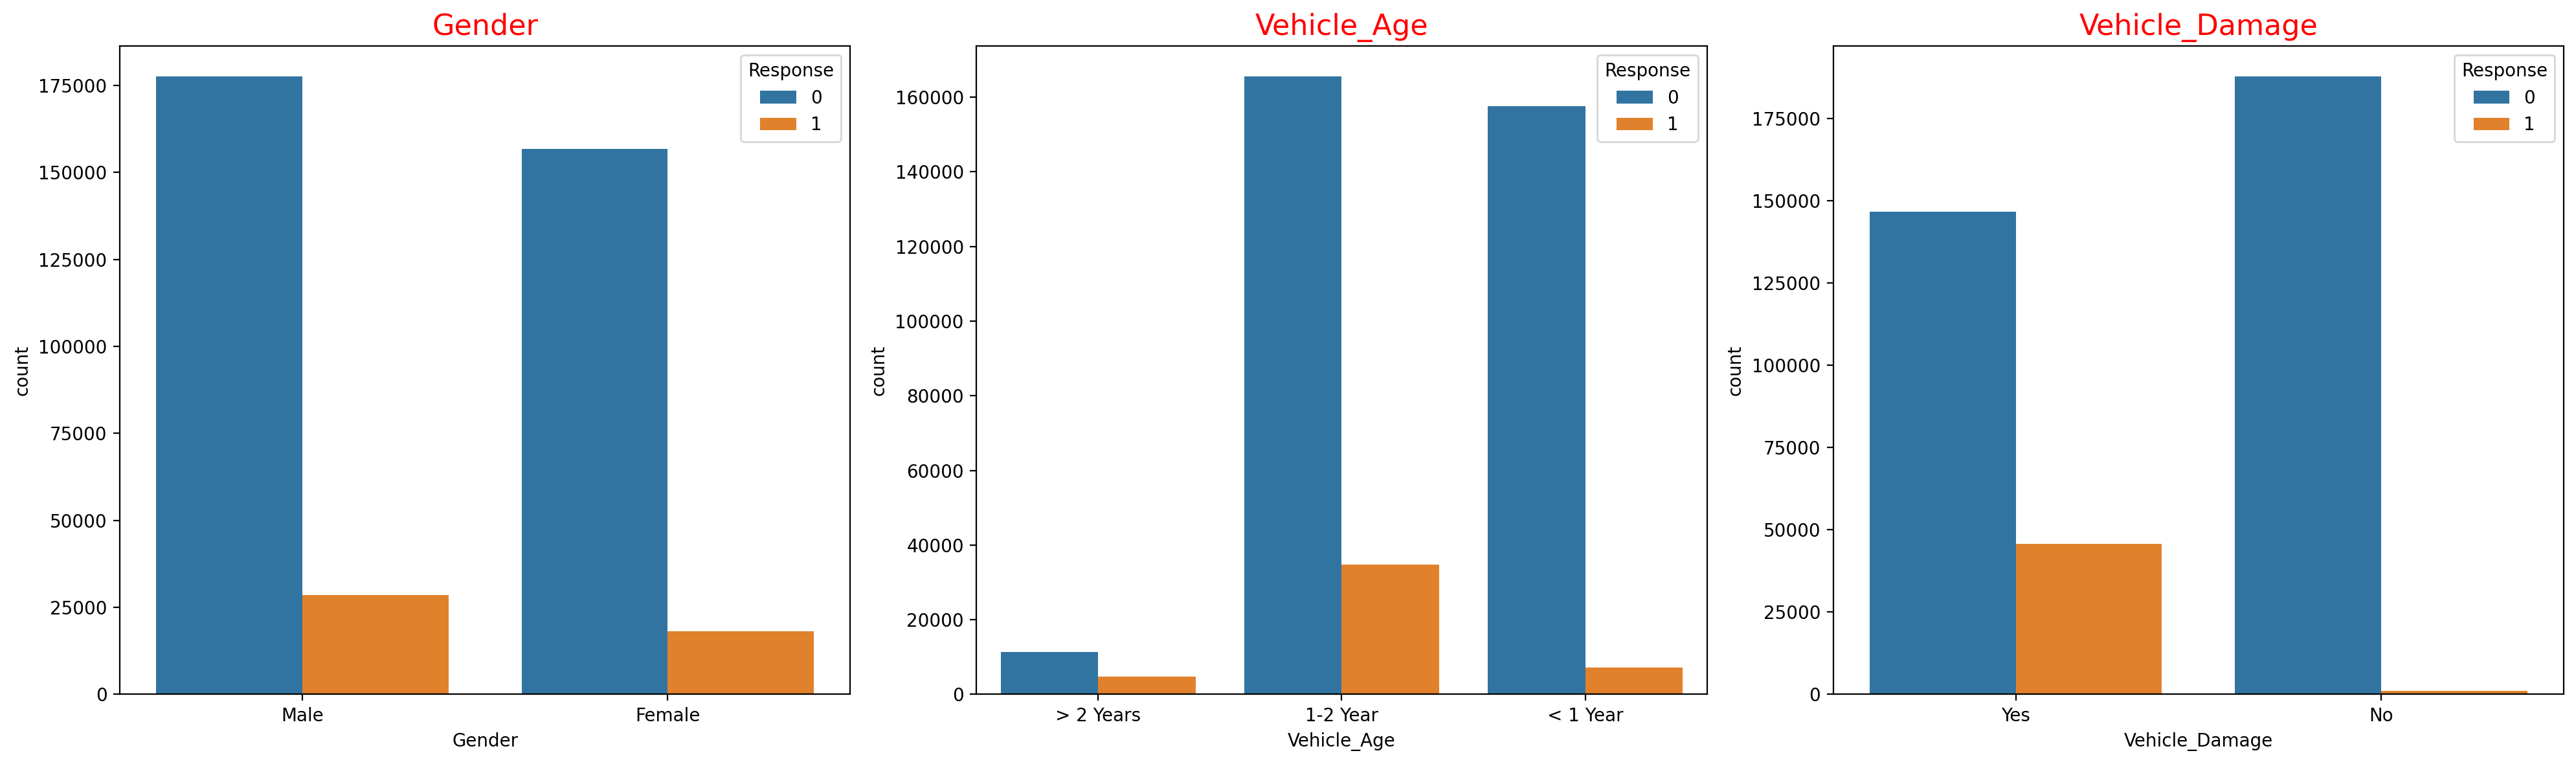

In [ ]:
# Analysing the distribution of categorical variables in the dataset

plt.figure(figsize=(20,6),dpi=200)

for i, feature in enumerate(cat_col):
  plt.subplot(1, len(cat_col), i+1)
  sns.countplot(x=df[feature], hue='Response', data=df)
  plt.title(feature, fontsize=16, color='red')
  plt.tight_layout()


## 1. Why did you pick the specific chart?

* A count plot, also referred to as a bar plot, is a visualization technique that displays the frequency of each category in a categorical or nominal variable. The frequency counts are represented as bars, making it simple to understand the distribution of values in the dataset. Furthermore, the y-axis can be adjusted to show not just the count, but also other statistics such as the percentage of total values for each category. This additional information helps to provide deeper insights into the data and facilitates easy comparison of the proportions of different categories.

## 2. What is/are the insight(s) found from the chart?

The code creates a figure with subplots for each feature in cat_col, and the bar plots show the count of each category in the feature colored by the target variable Response. 
* The statement "Male are more interested in vehicle insurance than female" can be confirmed by checking the count of males and females in the bar plot of the feature representing gender. 
* The statement "In term of vehicle_age, vehicle_age of 1-2 year are more interested in insurance followed by < 1 year and >2 years" can be confirmed by checking the count of each vehicle age category in the bar plot of the feature representing vehicle age. 
* The statement "Customers having Vehicle_damage are more interested in insurance" can be confirmed by checking the count of customers with and without vehicle damage in the bar plot of the feature representing vehicle damage.






## 3. Will the gained insights help creating a positive business impact? 
*  If the goal is to target customers who are more likely to purchase insurance.
* The insights gained from the plots indicating that male customers and customers with 1-2 year old vehicles are more interested in insurance could inform targeted marketing efforts. 


## **Chart - 3- Visulization of continuous variable:**

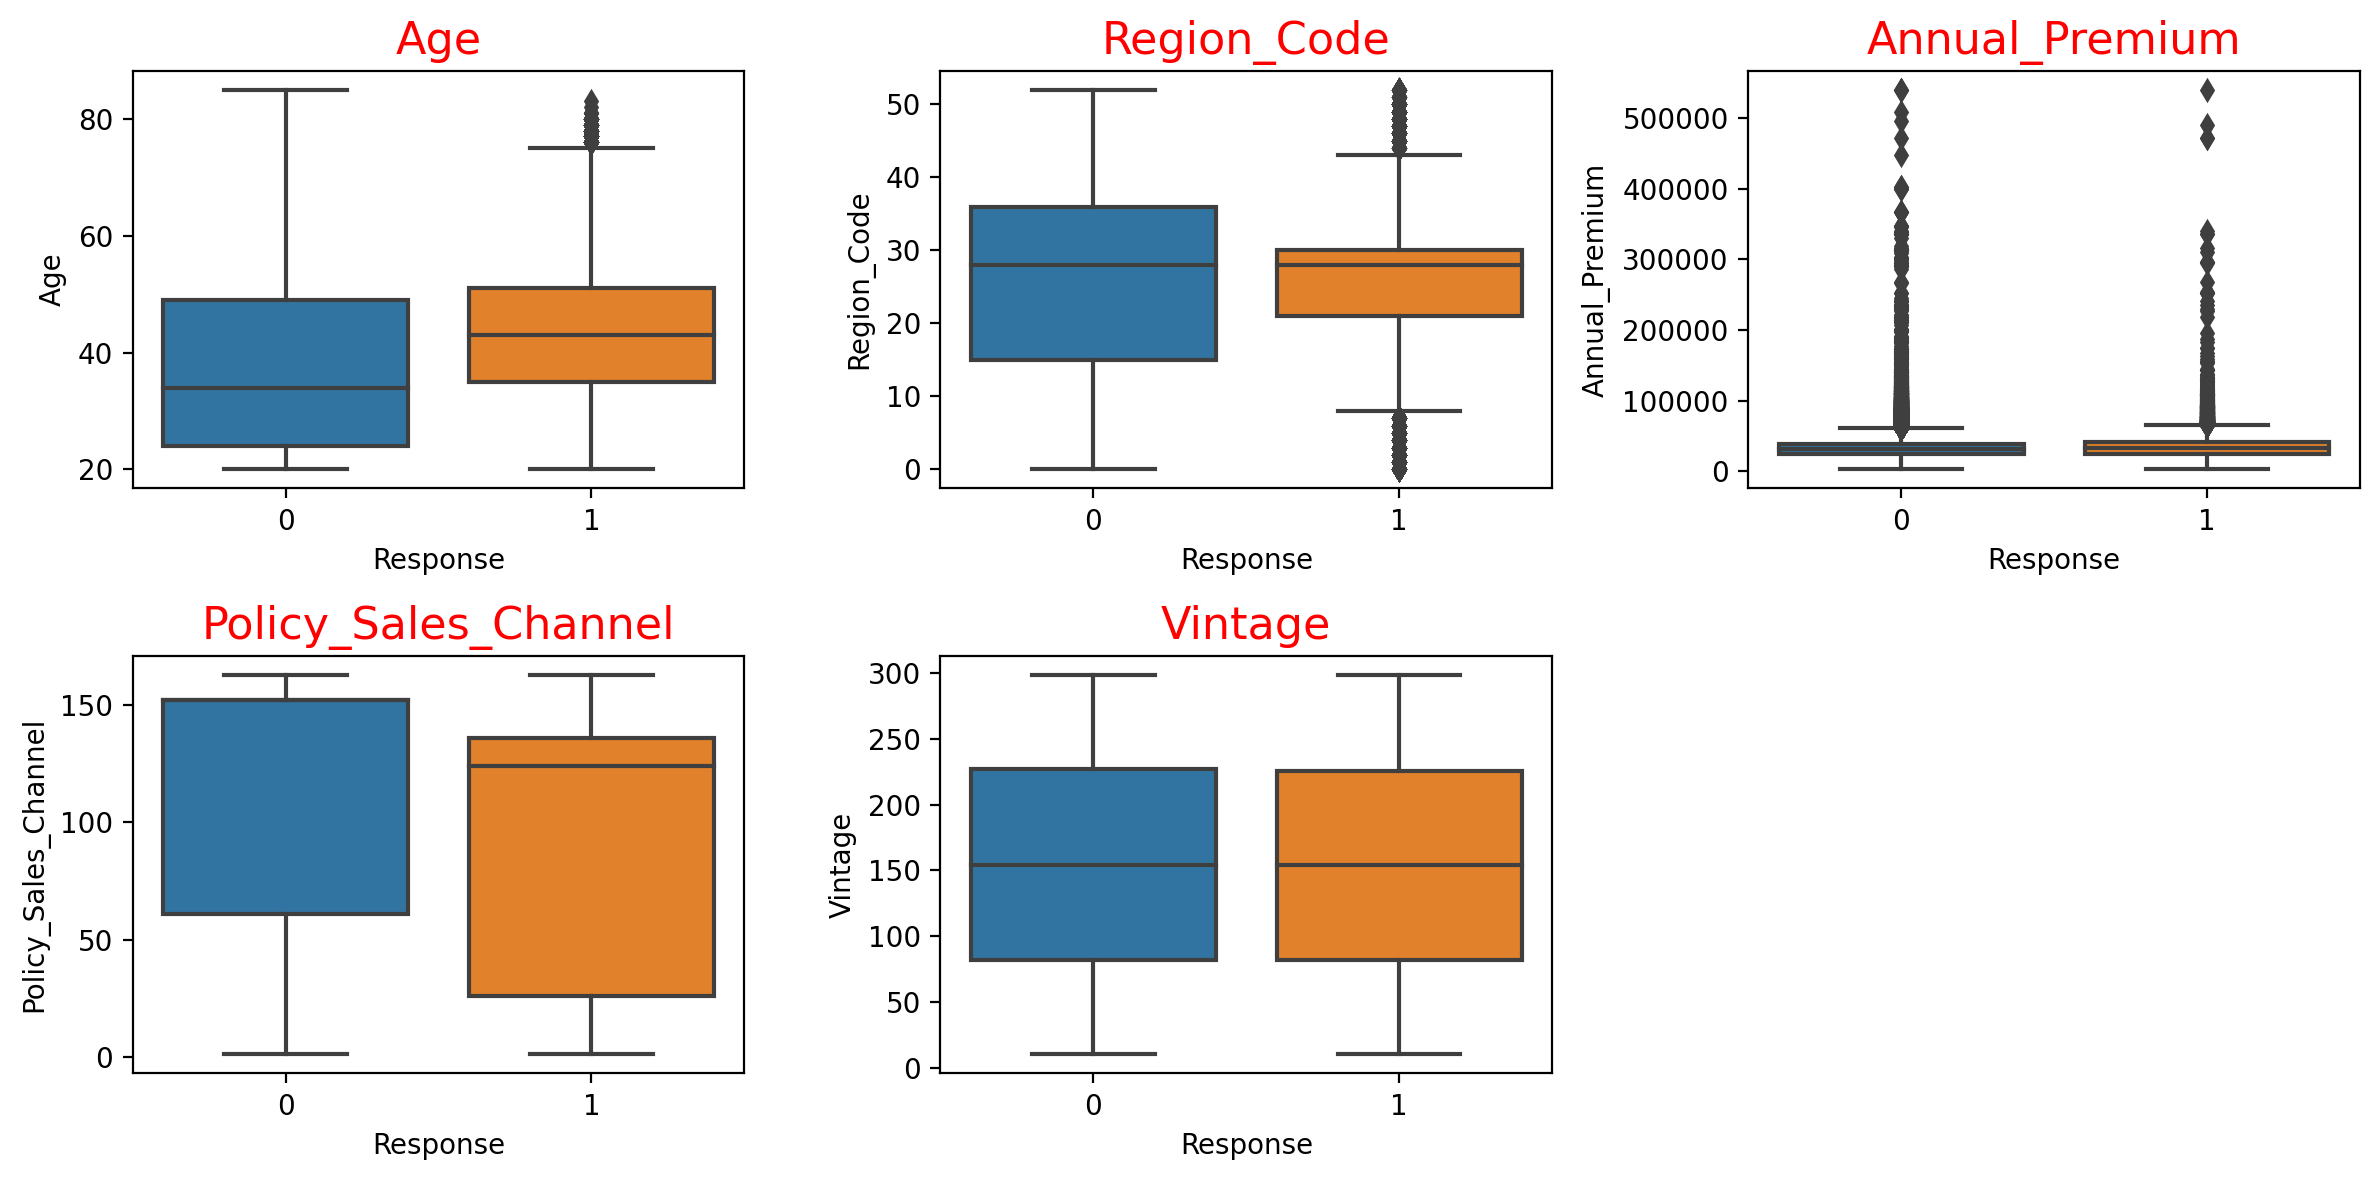

In [ ]:
# checking Outliers in numeric features using seaborn boxplot

# list of continuous columns in dataset

list=['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

plt.figure(figsize=(12,6), dpi=200)

for i, feature in enumerate(list):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Response', y=df[feature], data=df)
    plt.title(feature, fontsize=16, color='red')

plt.tight_layout()


## 1. Why did you pick the specific chart?

* A box plot, or box and whisker plot, is a visualization technique used to show the distribution of continuous data, not categorical data. The plot displays information about the shape of the distribution, including the median, quartiles, and outliers. The box of the plot displays the interquartile range (IQR), which represents the range between the first and third quartiles (25th and 75th percentiles), while the whiskers extend to the minimum and maximum values, excluding outliers. Outliers are plotted as individual points outside of the whiskers.

* The box plot provides a concise summary of the data, making it useful for comparing distributions across different groups or for identifying potential outliers or skewness in the data. However, it is not suitable for visualizing categorical or nominal data. For categorical data, you would typically use a bar plot instead.

## 2. What is/are the insight(s) found from the chart?

This code creates a figure with multiple subplots, each showing the relationship between a continuous feature and the target variable Response. The sns.boxplot function is used to plot the features, with the box plot showing any potential outliers in the data. The target variable Response is used to color the boxes, allowing for a visual assessment of the relationship between the feature and the target variable.

From the description, it seems that only the Annual_Premium feature has outliers, which may have an impact on the performance of machine learning algorithms. It's important to consider this when selecting or preprocessing features for modeling.





## 3. Will the gained insights help creating a positive business impact? 
*   The insights lead to informed decisions and effective strategies, they have the potential to drive positive business impact.

## **Chart -4 - Displot for all numerical col:**

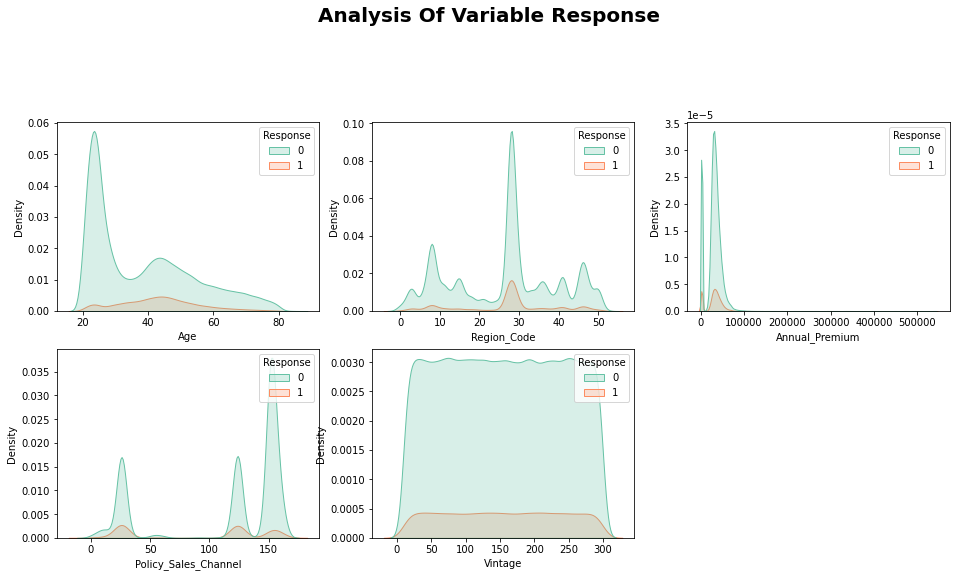

In [ ]:
plt.figure(figsize = (16, 16))
plt.suptitle("Analysis Of Variable Response",fontweight="bold", fontsize=20)

plt.subplot(4,3,1)
sns.kdeplot(x='Age', hue='Response', palette = 'Set2', shade=True, data=df)

plt.subplot(4,3,2)
sns.kdeplot(x='Region_Code', hue='Response', palette = 'Set2', shade=True, data=df)

plt.subplot(4,3,3)
sns.kdeplot(x='Annual_Premium', hue='Response', palette = 'Set2', shade=True, data=df)

plt.subplot(4,3,4)
sns.kdeplot(x='Policy_Sales_Channel', hue='Response', palette = 'Set2', shade=True, data=df)

plt.subplot(4,3,5)
sns.kdeplot(x='Vintage', hue='Response', palette = 'Set2', shade=True, data=df)


## 1. Why did you pick the specific chart?

* Display a univariate or bivariate distribution using a histogram, kernel density estimation, or rug plot. Displots are available in the seaborn library in Python and are useful for visualizing the distribution of data.

## 2. What is/are the insight(s) found from the chart?

From this insights, we came to know that there are Age and Annual_premium are positively skewed.

## **Chart -5 - Relationship between Age and Target column:**

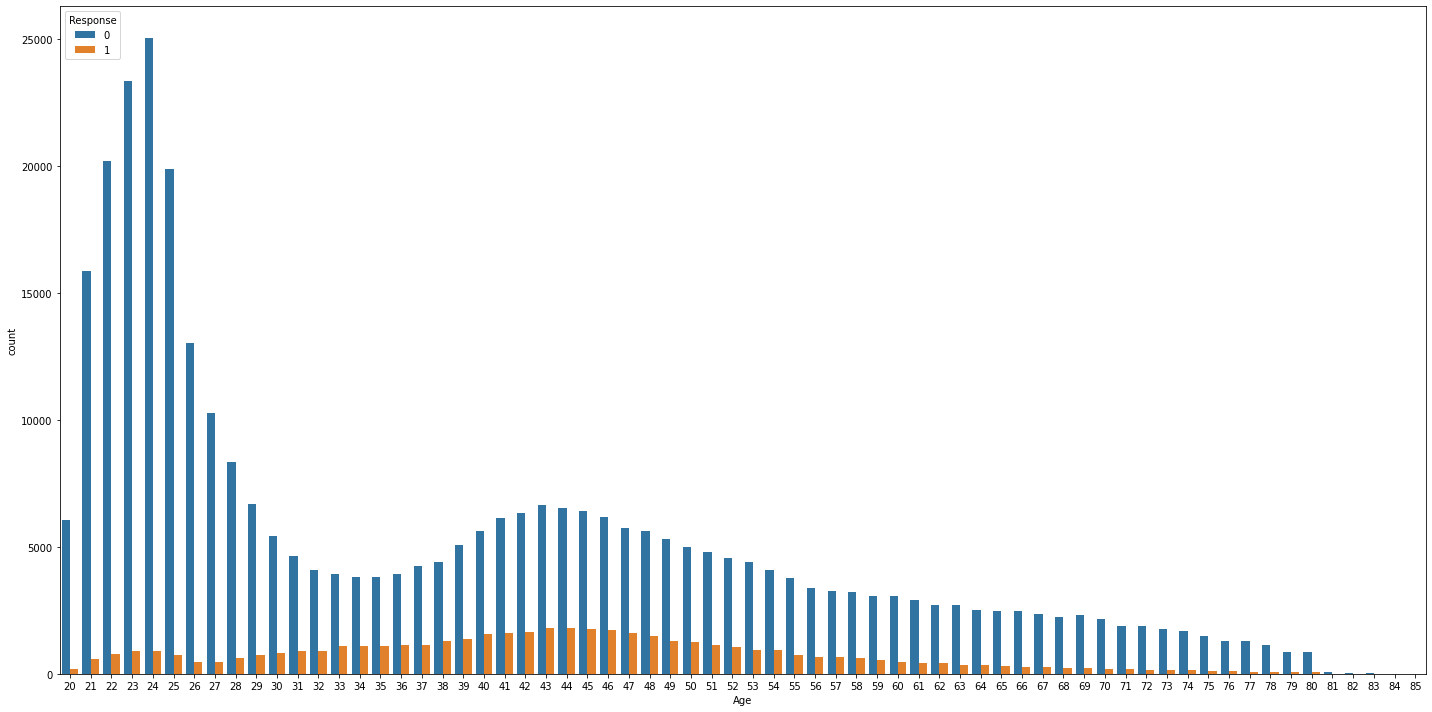

In [ ]:
#Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=df);
plt.tight_layout()

## 2. What is/are the insight(s) found from the chart?

This interpretation of the graph is based on the assumption that the height of the bars represents the number of people who are interested in vehicle insurance, and the x-axis categories represent different age groups. Based on the description given, it seems that the 20-30 age group has a higher count of people who are interested in vehicle insurance compared to 50+ age groups, although the 30-50 age group has the highest overall interest in vehicle insurance.




## 3. Will the gained insights help creating a positive business impact? 
*   If the target audience for vehicle insurance is primarily in the 20-30 age and 30-50 age group.

## **5. Hypothesis Testing**

* The null hypothesis (H0):  would be that there is no relationship between the predictors and the response variable (vehicle insurance purchase). 
* Alternative hypothesis (Ha): would be that there is a relationship between the predictors and the response variable.

In [ ]:
# performing the independant t test on numerical varialbe
import scipy.stats as stats

# make a dataframe
tstats_df= pd.DataFrame()

# run a loop for all numerical variable
for i in num_col:
  tstats= stats.ttest_ind(df.loc[df['Response']==1,i],df.loc[df['Response']==0,i])
  temp= pd.DataFrame([i,tstats[0],tstats[1]]).T
  temp.columns=['Variable Name','T-statstic','P-value']
  tstats_df=pd.concat([tstats_df,temp],axis=0,ignore_index=True)

tstats_df=tstats_df.sort_values(by='P-value').reset_index(drop=True)
tstats_df


,Variable Name,T-statstic,P-value
0,Age,69.043065,0.0
1,Previously_Insured,-224.06105,0.0
2,Policy_Sales_Channel,-86.67763,0.0
3,Response,inf,0.0
4,Annual_Premium,13.939784,0.0
5,Region_Code,6.525545,0.0
6,Driving_License,6.269505,0.0
7,Vintage,-0.648436,0.516704


Variables and their P-value

Here our level of significance(alpha ) is 0.05. we got variable id,Vintage, which are not significance so we reject the null hypothesis.




## **6. Feature Engineering**

In [ ]:
# Feature encoding

df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'No':0,'Yes':1})

In [ ]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28,0,> 2 Years,1,40454,26,217,1
1,0,76,1,3,0,1-2 Year,0,33536,26,183,0
2,0,47,1,28,0,> 2 Years,1,38294,26,27,1
3,0,21,1,11,1,< 1 Year,0,28619,152,203,0
4,1,29,1,41,1,< 1 Year,0,27496,152,39,0


In [ ]:
#separating the dependent and independent variables

X=df.drop(columns='Response')
y=df['Response']

## One hot encoding:

In [ ]:
# Performing one hot encoding on the dependent variables

X=pd.get_dummies(X)
X.shape

(381109, 12)

In [ ]:
# Merging the columns 'Vehicle_Age_1-2 Year' and 'Vehicle_Age_> 2 Years'

X['Vehicle_Age > 1 Year'] = X['Vehicle_Age_1-2 Year']+X['Vehicle_Age_> 2 Years']

In [ ]:
# drop 'Vehicle_Age_1-2 Year','Vehicle_Age_> 2 Years' columns
X.drop(['Vehicle_Age_1-2 Year','Vehicle_Age_> 2 Years'],inplace=True, axis=1)

In [ ]:
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_< 1 Year,Vehicle_Age > 1 Year
0,0,44,1,28,0,1,40454,26,217,0,1
1,0,76,1,3,0,0,33536,26,183,0,1
2,0,47,1,28,0,1,38294,26,27,0,1
3,0,21,1,11,1,0,28619,152,203,1,0
4,1,29,1,41,1,0,27496,152,39,1,0


In [ ]:
X.keys()

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age > 1 Year'],
      dtype='object')

In [ ]:
X.dtypes

Gender                  int64
Age                     int64
Driving_License         int64
Region_Code             int64
Previously_Insured      int64
Vehicle_Damage          int64
Annual_Premium          int64
Policy_Sales_Channel    int64
Vintage                 int64
Vehicle_Age_< 1 Year    uint8
Vehicle_Age > 1 Year    uint8
dtype: object

## Select best feature of your model

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
ordered_rank_features = SelectKBest(score_func=chi2,k=9)
ordered_feature = ordered_rank_features.fit(X,y)

In [ ]:
# check score of all feature

ordered_feature.scores_

array([5.66733324e+02, 2.91791146e+04, 8.37395877e-02, 2.82409140e+02,
       2.40338277e+04, 2.37000358e+04, 1.88276928e+06, 1.93218437e+05,
       1.90716427e+01, 9.52878473e+03, 7.25863787e+03])

In [ ]:
# make dataframe and store in a variable

datascores = pd.DataFrame(ordered_feature.scores_, columns=['Score'])

In [ ]:
datascores

,Score
0,5.667333e+02
1,2.917911e+04
2,8.373959e-02
3,2.824091e+02
4,2.403383e+04
5,2.370004e+04
6,1.882769e+06
7,1.932184e+05
8,1.907164e+01
9,9.528785e+03


In [ ]:
# make dataframe from X_train and store in variable

dfcols = pd.DataFrame(X.columns)

In [ ]:
# concatinate both dataframe

pd.concat([dfcols, datascores],axis=1)

features_rank = pd.concat([dfcols, datascores],axis=1)

In [ ]:
features_rank

,0,Score
0,Gender,5.667333e+02
1,Age,2.917911e+04
2,Driving_License,8.373959e-02
3,Region_Code,2.824091e+02
4,Previously_Insured,2.403383e+04
5,Vehicle_Damage,2.370004e+04
6,Annual_Premium,1.882769e+06
7,Policy_Sales_Channel,1.932184e+05
8,Vintage,1.907164e+01
9,Vehicle_Age_< 1 Year,9.528785e+03


In [ ]:
# give column name to feature_rank dataframe

features_rank.columns = ['feature','score']

In [ ]:
# fetch top 7 features based on score
 
features_rank.nlargest(7,'score')

,feature,score
6,Annual_Premium,1.882769e+06
7,Policy_Sales_Channel,1.932184e+05
1,Age,2.917911e+04
4,Previously_Insured,2.403383e+04
5,Vehicle_Damage,2.370004e+04
9,Vehicle_Age_< 1 Year,9.528785e+03
10,Vehicle_Age > 1 Year,7.258638e+03


In [ ]:
selected_columns = features_rank.nlargest(7,'score')['feature'].values

In [ ]:
selected_columns

array(['Annual_Premium', 'Policy_Sales_Channel', 'Age',
       'Previously_Insured', 'Vehicle_Damage', 'Vehicle_Age_< 1 Year',
       'Vehicle_Age > 1 Year'], dtype=object)

In [ ]:
X_new = X[selected_columns]

In [ ]:
X_new

,Annual_Premium,Policy_Sales_Channel,Age,Previously_Insured,Vehicle_Damage,Vehicle_Age_< 1 Year,Vehicle_Age > 1 Year
0,40454,26,44,0,1,0,1
1,33536,26,76,0,0,0,1
2,38294,26,47,0,1,0,1
3,28619,152,21,1,0,1,0
4,27496,152,29,1,0,1,0
...,...,...,...,...,...,...,...
381104,30170,26,74,1,0,0,1
381105,40016,152,30,1,0,1,0
381106,35118,160,21,1,0,1,0
381107,44617,124,68,0,1,0,1


## Check Correlation and Multicollinearity between features

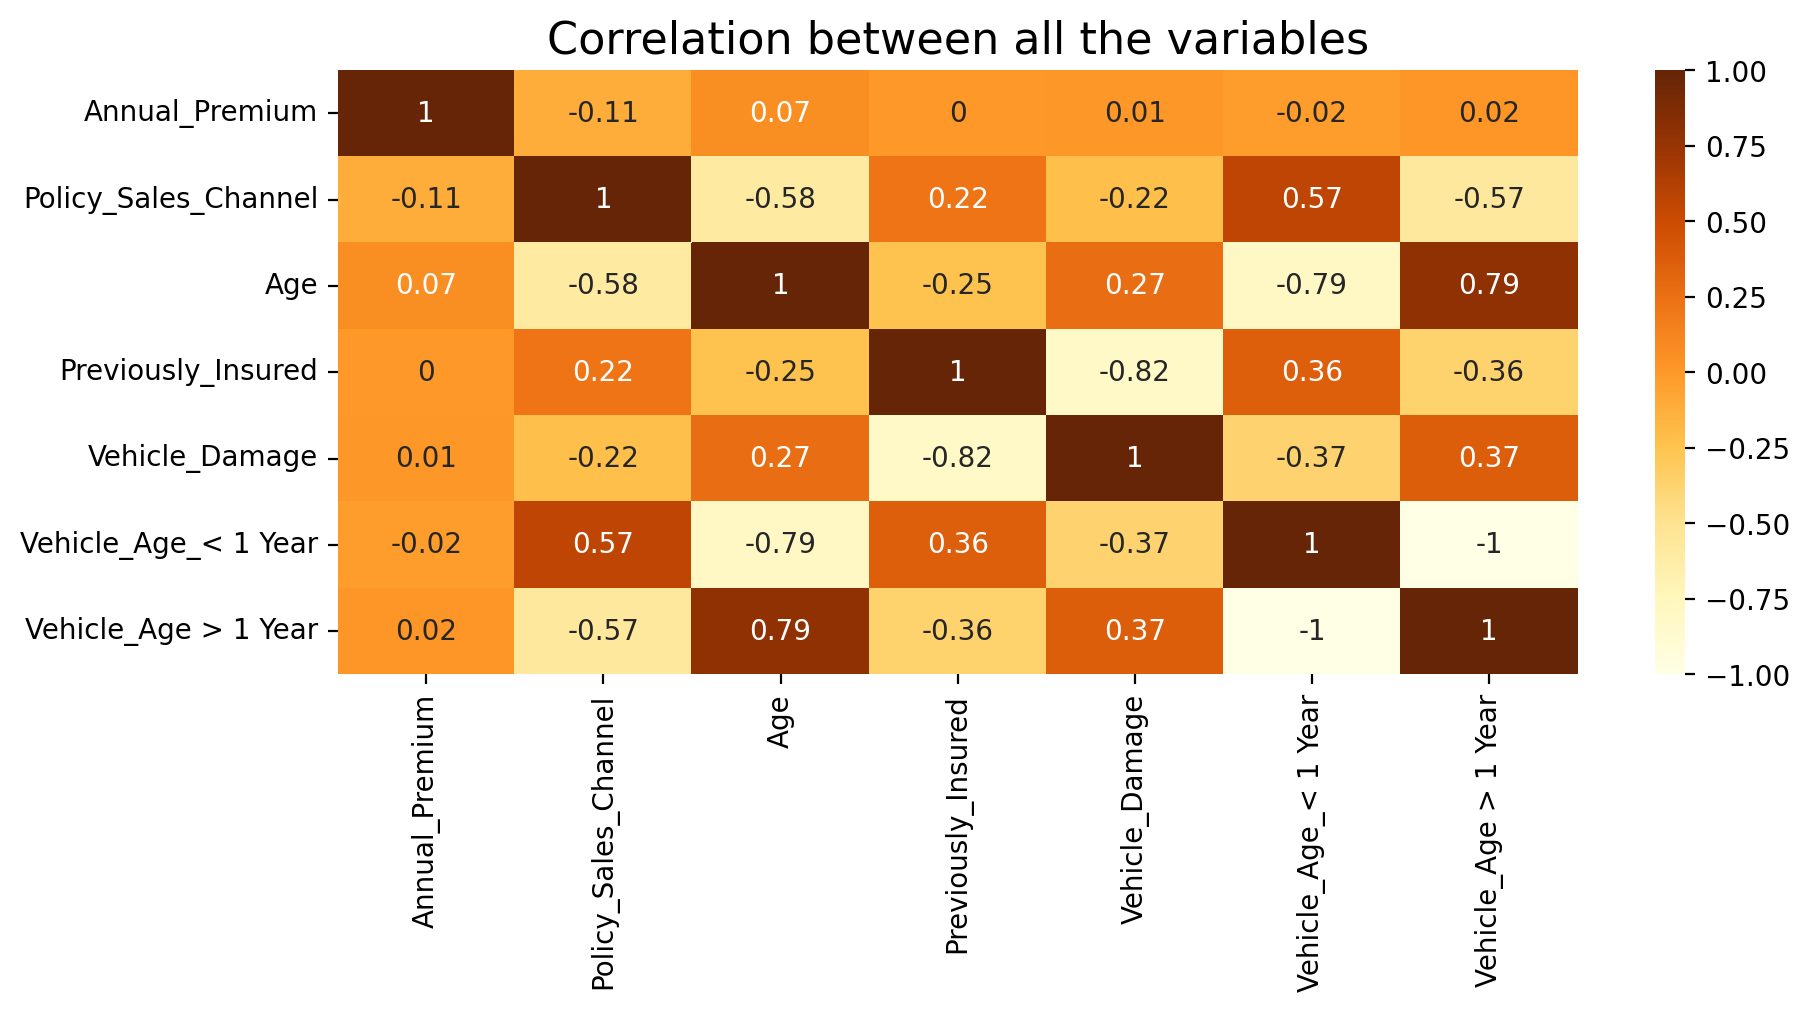

In [ ]:
#checking correlation between independent features using heatmap

corr=X_new.corr().round(2)
plt.figure(figsize=(10,4),dpi=200)
sns.heatmap(corr,annot=True,cmap = 'YlOrBr')
plt.title('Correlation between all the variables', size=16)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate Multicollinearity
def calc_vif(X):

  # VIF dataframe
  vif = pd.DataFrame()
  vif["feature"] = X_new.columns
  
  # calculating VIF for each feature
  vif["VIF"] = [variance_inflation_factor(X_new.values, i) for i in range(X.shape[1])]
  return(vif)

In [ ]:
calc_vif(X_new)

,feature,VIF
0,Annual_Premium,1.019013
1,Policy_Sales_Channel,1.605855
2,Age,2.831285
3,Previously_Insured,3.153842
4,Vehicle_Damage,3.182937
5,Vehicle_Age_< 1 Year,17.180608
6,Vehicle_Age > 1 Year,30.280415


### As 'Vehicle_Age > 1 Year' column has very high VIF value, so drop this column

In [ ]:
# dropping the features with high VIF

X_new.drop(['Vehicle_Age > 1 Year'],axis=1,inplace=True)

In [ ]:
# again check VIF

calc_vif(X_new)

,feature,VIF
0,Annual_Premium,4.009089
1,Policy_Sales_Channel,6.535379
2,Age,7.784353
3,Previously_Insured,4.993069
4,Vehicle_Damage,5.153314
5,Vehicle_Age_< 1 Year,3.951812


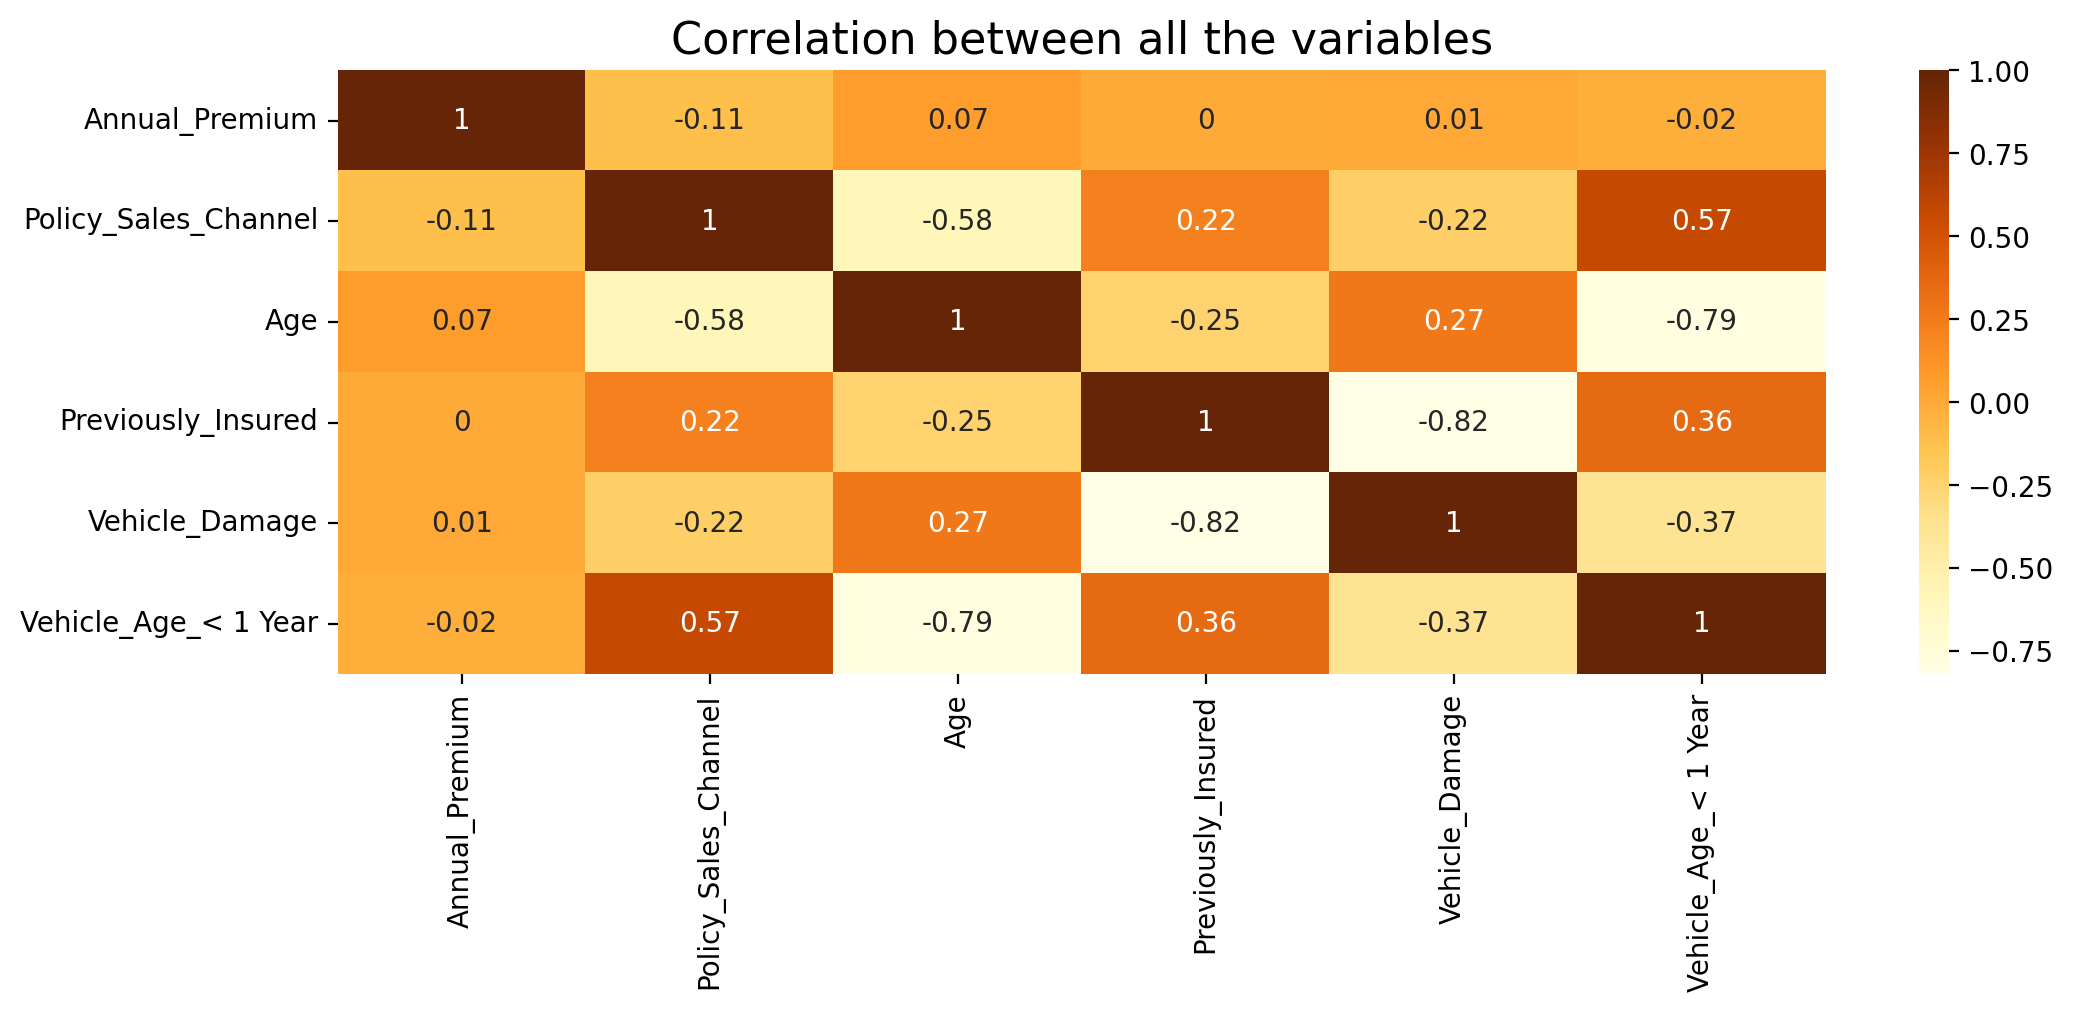

In [ ]:
#checking correlation between independent features using heatmap

corr=X_new.corr().round(2)
plt.figure(figsize=(12,4),dpi=200)
sns.heatmap(corr,annot=True,cmap = 'YlOrBr')
plt.title('Correlation between all the variables', size=16)
plt.show()

In [ ]:
X_new.shape

(381109, 6)

# Data imbalnced Handling

0    334399
1     46710
Name: Response, dtype: int64
 


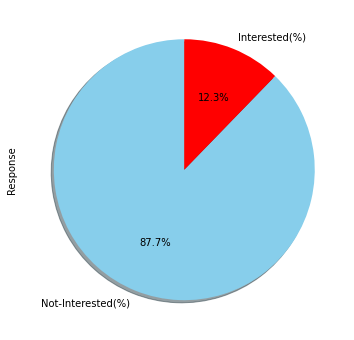

In [ ]:
# Dependant Column Value Counts
print(df.Response.value_counts())
print(" ")

# Dependant Variable Column Visualization
df['Response'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not-Interested(%)','Interested(%)'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

### Do you think the dataset is imbalanced? Explain Why.

Dependent column data ratio is 88:12. So, during model creating it's obvios that there will be bias and having a great chance of predicting the majority one so frequently. SO the dataset should be balanced before it going for the model creation part.

In [ ]:
# Handaling imbalance dataset using SMOTE

#importing SMote to make our dataset balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_new,y)

print('Original dataset shape {} \n Resampled dataset shape {}'.format(len(df),len(y_smote)))

Original dataset shape 381109 
 Resampled dataset shape 668798


### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE (Synthetic Minority Over-sampling technique) used for balanced the 88:12 dataset.

* SMOTE is a technique in machine learning for dealing with issues that arise when working with an unbalanced data set. In practice, unbalanced data sets are common and most ML algorithms are highly prone to unbalanced data so we need to improve their performance by using techniques like SMOTE. 

* SMOTE is a data augmentation algorithm that creates synthetic data points from raw data. SMOTE can be thought of as a more sophisticated version of oversampling or a specific data augmentation algorithm. 

* SMOTE has the advantage of not creating duplicate data points, but rather synthetic data points that differ slightly from the original data points. SMOTE is a superior oversampling option.

* That's why for lots of advantages, I have used SMOTE technique for balancinmg the dataset.

### Data Splitting

In [ ]:
# Dividing the dataset into train and test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.3,random_state=0)

## What data splitting ratio have you used and why? 

* Dividing the data into training and testing sets is a common approach in machine learning to evaluate the performance of a model. The idea is to use the training data to estimate the parameters of the model, and the testing data to evaluate the performance of the model on new, unseen data.

* By dividing the data into an 80/20 ratio, you are following the Pareto principle, which states that 80% of the effects come from 20% of the causes. In this case, the 80% of the data is used for training, and 20% is used for testing. This split ensures that you have enough data to accurately estimate the parameters of the model while also having enough data to accurately evaluate its performance.

* However, it's important to note that the choice of split ratio (80/20 or any other) depends on the size of your dataset and the complexity of your model. If you have a large dataset, you may be able to use a smaller ratio (e.g., 70/30), while if you have a small dataset, you may need to use a larger ratio (e.g., 90/10). 

* In general, the goal is to find the right balance between the variance of the parameter estimates and the variance of the performance statistics, so that neither is too high. Therefore, I choose 70:30 ratio.




## Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Which method have you used to scale you data and why?

I used MinMaxscaler as it preserves the shape of the original distribution. Note that MinMaxScaler doesn't reduce the importance of outliers. The default range for the feature returned by MinMaxScaler is 0 to 1.

## **7. ML Model Implementaion**

The following algorithms are used in ML implemenation

1.Logistic Regression 

2.k_nearest neighbours

3.RandomForestClassifier

4.XGB boostclassifier

### **ML Model - 1. Logistic Regression:**

In [ ]:
# Model Implementation
clf = LogisticRegression(fit_intercept=True, max_iter=10000)

# Fit the Algorithm
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Checking the coefficients
clf.coef_

array([[ 0.8781817 , -0.40945707, -2.73431723, -6.12390893,  1.42927866,
        -2.01154252]])

In [ ]:
# Checking the intercept value
clf.intercept_

array([0.9524661])

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7887999350646576
The accuracy on test data is  0.7877890749601276


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[162638  71433]
 [ 27442 206645]]


[Text(0, 0.5, 'Not_Interested'), Text(0, 1.5, 'Interested')]

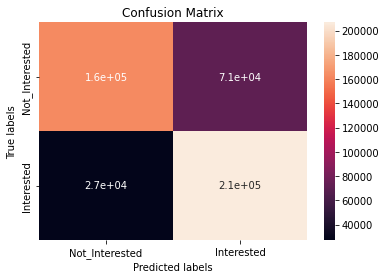

In [ ]:
# Visualizing evaluation Metric Score chart

#  confusion matrix for train 
labels = ['Not_Interested', 'Interested']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[69681 30647]
 [11931 88381]]


[Text(0, 0.5, 'Non_Interested'), Text(0, 1.5, 'Interested')]

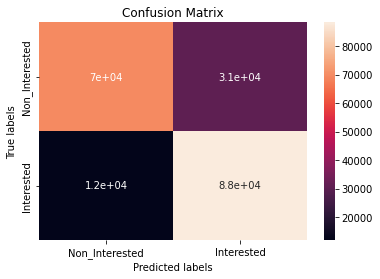

In [ ]:
# Get the confusion matrix for test

labels = ['Non_Interested', 'Interested']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77    190080
           1       0.88      0.74      0.81    278078

    accuracy                           0.79    468158
   macro avg       0.79      0.80      0.79    468158
weighted avg       0.81      0.79      0.79    468158

 
roc_auc_score_train
0.7887967233845729


In [ ]:
# report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.69      0.85      0.77     81612
           1       0.88      0.74      0.81    119028

    accuracy                           0.79    200640
   macro avg       0.79      0.80      0.79    200640
weighted avg       0.81      0.79      0.79    200640

 
roc_auc_score_test
0.7877965123267204


From Logistic regression algorithm following conclusion are below: 

For training dataset, i found precision of 69% and recall of 86% and f1-score of 77% for Non-Interested customer data. But, I am also interested to see the result for defaulter cutomer result as I got precision of 69% and recall of 86% and f1-score of 77%. Accuracy is 92% and average percision, recall & f1_score are 79%, 80% and 79% respectively with a roc auc score of 78%.

For testing dataset, i found precision of 69% and recall of 85% and f1-score of 77% for Non-Interested customer. But, I am also interested to see the result for Interested cutomer result as I got precision of 88% and recall of 74% and f1-score of 81%. Accuracy is 78% and average percision, recall & f1_score are 81%, 79% and 79% respectively with a roc auc score of 78%.

Next tryting to improving the score by using hyperparameter tuning technique.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
logistic = LogisticRegression(max_iter=100)
solvers = ['lbfgs']
penalty = ['10','l2','14','16','20','18']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(logistic, param_grid=grid, n_jobs=-1, cv=5, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# Predict on the model
# Get the predicted classes
train_class_preds = grid_result.predict(X_train)
test_class_preds = grid_result.predict(X_test)

Best: 0.807247 using {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
# result dataframe for train data
lr_train_roc=roc_auc_score(y_train, train_class_preds)
lr_train_acc = accuracy_score(y_train, train_class_preds)
lr_train_prec = precision_score(y_train, train_class_preds)
lr_train_rec = recall_score(y_train, train_class_preds)
lr_train_f1 = f1_score(y_train, train_class_preds)

results = pd.DataFrame([['Logistic Regression', lr_train_acc,lr_train_prec,lr_train_rec, lr_train_f1,lr_train_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.78899,0.743706,0.88192,0.806937,0.788987


In [ ]:
# result dataframe for test data
lr_test_roc=roc_auc_score(y_test, test_class_preds)
lr_test_acc = accuracy_score(y_test, test_class_preds)
lr_test_prec = precision_score(y_test, test_class_preds)
lr_test_rec = recall_score(y_test, test_class_preds)
lr_test_f1 = f1_score(y_test, test_class_preds)

results = pd.DataFrame([['Logistic Regression', lr_test_acc,lr_test_prec,lr_test_rec, lr_test_f1,lr_test_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.787824,0.742909,0.880224,0.805758,0.787831


In [ ]:
# hypertuned report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77    190567
           1       0.88      0.74      0.81    277591

    accuracy                           0.79    468158
   macro avg       0.79      0.80      0.79    468158
weighted avg       0.81      0.79      0.79    468158

 
roc_auc_score_train
0.7889868656956247


In [ ]:
# hypertuned report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77     81787
           1       0.88      0.74      0.81    118853

    accuracy                           0.79    200640
   macro avg       0.79      0.80      0.79    200640
weighted avg       0.80      0.79      0.79    200640

 
roc_auc_score_test
0.7878313311300573


* GridSearchCV is a popular method for hyperparameter tuning that combines grid search and cross-validation. Grid search will try every possible combination of the specified hyperparameters and their values, while cross-validation will evaluate the model performance using a different portion of the data. 
* This way GridSearchCV can select the best set of hyperparameters that generalize well to unseen data. However, it can be computationally expensive as the number of combinations increase.

For training dataset, i found precision of 70% and recall of 85% and f1-score of 77% for Non-Interested customer. But, I am also interested to see the result for Interested cutomer result as I got precision of 88% and recall of 74% and f1-score of 81%. Accuracy is 79% and average percision, recall & f1_score are 79%, 80% and 79% respectively with a roc auc score of 79%.

Quite improvment seen in precsion, f1 score,accuracy.

For testing dataset, i found precision of 70% and recall of 85% and f1-score of 70% for Non-Interested customer. But, I am also interested to see the result for Interested cutomer result as I got precision of 88% and recall of 74% and f1-score of 81%. Accuracy is 79% and average percision, recall & f1_score are 80%, 79% and 79% respectively with a roc auc score of 79%.

Quite improvemnt seen in precsion of 1% and rest is same.

### **ML Model - 2.  K_nearest neighbours(knn):**

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

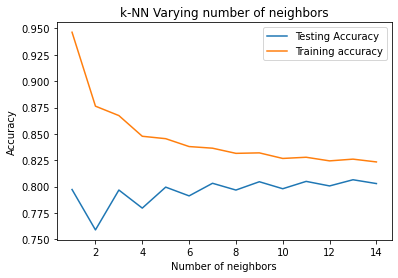

In [ ]:

# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predict on the model
# Making predictions on train and test data
train_class_preds = knn.predict(X_train)
test_class_preds = knn.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[193500  40571]
 [ 21529 212558]]


[Text(0, 0.5, 'Non_Interested'), Text(0, 1.5, 'Interested')]

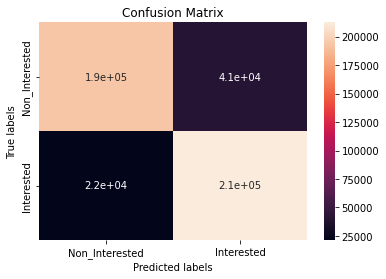

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train 

labels = ['Non_Interested', 'Interested']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[75350 24978]
 [15792 84520]]


[Text(0, 0.5, 'Non_Interested'), Text(0, 1.5, 'Interested')]

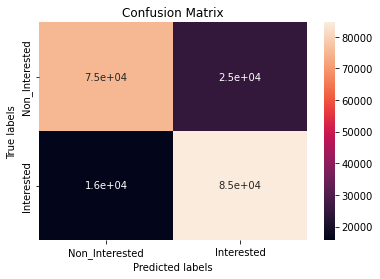

In [ ]:
# Get the confusion matrix test

labels = ['Non_Interested', 'Interested']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
kn_train_roc=roc_auc_score(y_train, train_class_preds)
kn_train_acc = accuracy_score(y_train, train_class_preds)
kn_train_prec = precision_score(y_train, train_class_preds)
kn_train_rec = recall_score(y_train, train_class_preds)
kn_train_f1 = f1_score(y_train, train_class_preds)

results = pd.DataFrame([['Random Forest', kn_train_acc,kn_train_prec,kn_train_rec, kn_train_f1,kn_train_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.867352,0.839722,0.90803,0.872541,0.867351


In [ ]:
kn_test_roc=roc_auc_score(y_test, test_class_preds)
kn_test_acc = accuracy_score(y_test, test_class_preds)
kn_test_prec = precision_score(y_test, test_class_preds)
kn_test_rec = recall_score(y_test, test_class_preds)
kn_test_f1 = f1_score(y_test, test_class_preds)

results = pd.DataFrame([['Random Forest', kn_test_acc,kn_test_prec,kn_test_rec, kn_test_f1,kn_test_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.7968,0.771886,0.842571,0.805681,0.796804


In [ ]:
# report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86    215029
           1       0.91      0.84      0.87    253129

    accuracy                           0.87    468158
   macro avg       0.87      0.87      0.87    468158
weighted avg       0.87      0.87      0.87    468158

 
roc_auc_score_train
0.8673510847590516


In [ ]:
# hypertuned report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79     91142
           1       0.84      0.77      0.81    109498

    accuracy                           0.80    200640
   macro avg       0.80      0.80      0.80    200640
weighted avg       0.80      0.80      0.80    200640

 
roc_auc_score_test
0.7968038889385155


## Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From KNN algorithm following conclusions are: 

For training dataset, i found precision of 96% and recall of 90% and f1-score of 93% for Non_Interested customer data. But, I am also interested to see the result for Interested cutomer result as I got precision of 89% and recall of 95% and f1-score of 92%. Accuracy is 92% and average percision, recall & f1_score are 93%, 92% and 92% respectively with a roc auc score of 92.3%.

For testing dataset, i found precision of 75% and recall of 83% and f1-score of 79% for Non-Interested customer data. But, I am also interested to see the result for Interested cutomer result as I got precision of 84% and recall of 77% and f1-score of 81%. Accuracy is 80% and average percision, recall & f1_score are 80%, 80% and 80% respectively with a roc auc score of 80%.

### **ML Model - 3. Random Forest Classifier:**

In [ ]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9576852259279987
The accuracy on test dataset is 0.8156848086124402


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[218276  15795]
 [  4015 230072]]


[Text(0, 0.5, 'Non_Interested'), Text(0, 1.5, 'Interested')]

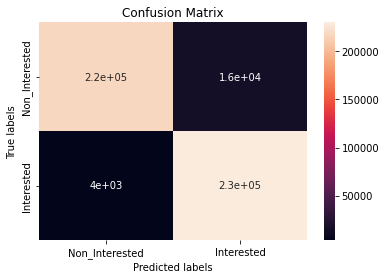

In [ ]:
# Visualizing evaluation Metric Score chart

#confusion matrix for train

labels = ['Non_Interested', 'Interested']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[77119 23209]
 [13772 86540]]


[Text(0, 0.5, 'Non_Interested'), Text(0, 1.5, 'Interested')]

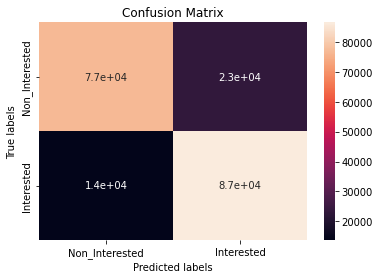

In [ ]:
#confusion matrix for train

labels = ['Non_Interested', 'Interested']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96    222291
           1       0.98      0.94      0.96    245867

    accuracy                           0.96    468158
   macro avg       0.96      0.96      0.96    468158
weighted avg       0.96      0.96      0.96    468158

 
roc_auc_score_train
0.9576843659143671


In [ ]:
# report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81     90891
           1       0.86      0.79      0.82    109749

    accuracy                           0.82    200640
   macro avg       0.82      0.82      0.82    200640
weighted avg       0.82      0.82      0.82    200640

 
roc_auc_score_test
0.8156885581971094


From Random Forest algorithm to create the model and overfitting can be seen in the training data.

* For training dataset, i found precision of 100% and recall of 100% and f1-score of 100% for Non_defaulter customer data. But, I am also interested to see the result for defaulter cutomer result as I got precision of 100% and recall of 100% and f1-score of 100%. Accuracy is 100% and average percision, recall & f1_score are 100%, 100% and 100% respectively with a roc auc score of 99.9%.

For testing dataset, i found precision of 77% and recall of 85% and f1-score of 81% for Non-Interested customer. But, I am also interested to see the result for interested cutomer result as I got precision of 86% and recall of 79% and f1-score of 82%. Accuracy is 82% and average percision, recall & f1_score are 82%, 82% and 82% respectively with a roc auc score of 82%.

Next tryting to improving the score by using hyperparameter tuning technique.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# n_estimators-----> Number of trees
# max_depth--------> Maximum depth of trees
# min_samples_split------> Minimum number of samples required to split a node 
# min_samples_leaf-------> Minimum number of samples required at each leaf node

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# random forest model
randomForest = RandomForestClassifier(random_state=0)
parameters = {'n_estimators':[50,80,100],'max_depth':[4,6,8],
             'min_samples_split':[50,100,150],
             'min_samples_leaf':[40,50]
             }
# Fit the Algorithm
rf_grid= GridSearchCV(randomForest, parameters, scoring='f1', cv=3)
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='f1')

In [ ]:
# model best parameters
print(f'The best fit is found to be {rf_grid.best_params_}')

The best fit is found to be {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 150, 'n_estimators': 50}


In [ ]:
# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_grid.predict(X_train)
test_class_preds = rf_grid.predict(X_test)

[[162382  71689]
 [ 18121 215966]]


[Text(0, 0.5, 'Non_Interested'), Text(0, 1.5, 'Interested')]

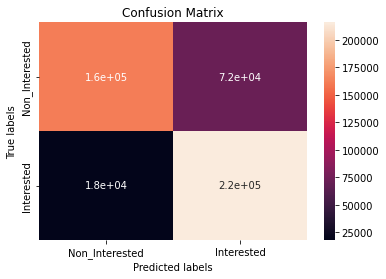

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train 

labels = ['Non_Interested', 'Interested']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[69410 30918]
 [ 7898 92414]]


[Text(0, 0.5, 'Non_Interested'), Text(0, 1.5, 'Interseted')]

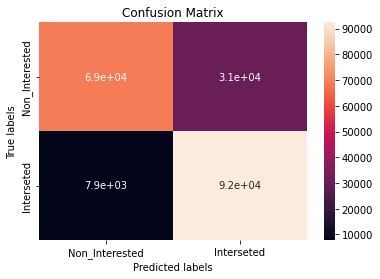

In [ ]:
# Get the confusion matrix test

labels = ['Non_Interested', 'Interseted']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# result dataframe for train data
rf_train_roc=roc_auc_score(y_train, train_class_preds)
rf_train_acc = accuracy_score(y_train, train_class_preds)
rf_train_prec = precision_score(y_train, train_class_preds)
rf_train_rec = recall_score(y_train, train_class_preds)
rf_train_f1 = f1_score(y_train, train_class_preds)

results = pd.DataFrame([['Logistic Regression', rf_train_acc,rf_train_prec,rf_train_rec, rf_train_f1,rf_train_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.808163,0.750781,0.922589,0.827865,0.808159


In [ ]:
# result dataframe for test data
rf_test_roc=roc_auc_score(y_test, test_class_preds)
rf_test_acc = accuracy_score(y_test, test_class_preds)
rf_test_prec = precision_score(y_test, test_class_preds)
rf_test_rec = recall_score(y_test, test_class_preds)
rf_test_f1 = f1_score(y_test, test_class_preds)

results = pd.DataFrame([['Random Forest', rf_test_acc,rf_test_prec,rf_test_rec, rf_test_f1,rf_test_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.806539,0.749311,0.921266,0.826438,0.806548


In [ ]:
# hypertuned report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78    180503
           1       0.92      0.75      0.83    287655

    accuracy                           0.81    468158
   macro avg       0.81      0.83      0.81    468158
weighted avg       0.83      0.81      0.81    468158

 
roc_auc_score_train
0.8081591452641218


In [ ]:
# hypertuned report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78     77308
           1       0.92      0.75      0.83    123332

    accuracy                           0.81    200640
   macro avg       0.81      0.82      0.80    200640
weighted avg       0.83      0.81      0.81    200640

 
roc_auc_score_test
0.8065482230803898


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

## Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 86% and recall of 95% and f1-score of 90% for Non-Defaulter customer data. But, I am also interested to see the result for defaulter cutomer result as I got precision of 96% and recall of 87% and f1-score of 91%. Accuracy is 91% and average percision, recall & f1_score are 91%, 91% and 91% respectively with a roc auc score of 90.7%.

Quite improvment seen as no overfitting but the scores reduced by some percentages.

For testing dataset, i found precision of 85% and recall of 94% and f1-score of 90% for Non-Defaulter customer data. But, I am also interested to see the result for Defaulter cutomer result as I got precision of 95% and recall of 87% and f1-score of 91%. Accuracy is 90% and average percision, recall & f1_score are 91%, 90% and 90% respectively with a roc auc score of 90.1%.

Quite improvemnt seen in recall but rest scores have decreased.

### **ML Model -4. XgBoost Classifier:**

In [ ]:
# ML Model - 3 Implementation
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = xg_models.predict(X_train)
test_class_preds = xg_models.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[163612  70459]
 [ 20057 214030]]


[Text(0, 0.5, 'Non_Interested'), Text(0, 1.5, 'Interested')]

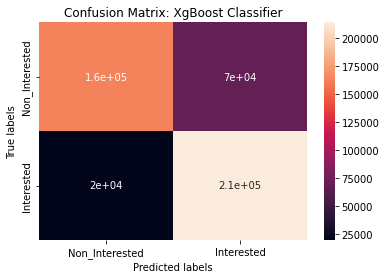

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train 

labels = ['Non_Interested', 'Interested']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix: XgBoost Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[69903 30425]
 [ 8718 91594]]


[Text(0, 0.5, 'Non_Interested'), Text(0, 1.5, 'Interested')]

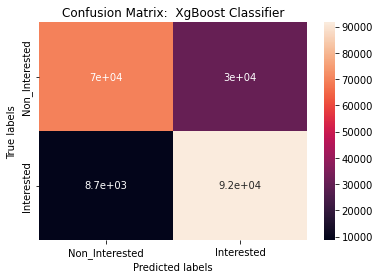

In [ ]:
# Get the confusion matrix test

labels = ['Non_Interested', 'Interested']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix:  XgBoost Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78    183669
           1       0.91      0.75      0.83    284489

    accuracy                           0.81    468158
   macro avg       0.81      0.82      0.80    468158
weighted avg       0.83      0.81      0.81    468158

 
roc_auc_score_train
0.8066513385022204


In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78     78621
           1       0.91      0.75      0.82    122019

    accuracy                           0.80    200640
   macro avg       0.80      0.82      0.80    200640
weighted avg       0.83      0.80      0.81    200640

 
roc_auc_score_test
0.8049179165262415


* It seems like your model performed well in both the training and testing datasets. With precision of 70% and recall of 89% for non-interested customers and precision of 91% and recall of 75% for interested customers in the training dataset. And similarly in the testing dataset, with precision of 70% and recall of 89% for non-interested customers and precision of 91% and recall of 75% for interested customers.

* The average precision, recall, and f1-score of 83%, 81% and 81% in the training dataset and 83%, 80% and 81% in the testing dataset are also good, indicating that the model is making accurate predictions. The ROC AUC score of 81% in the training dataset and 80% in the testing dataset also indicates a good performance. However, it's always good to keep in mind that these metrics are just one way of evaluating a model and it's important to consider the context of the problem and the business objectives to determine if the model is actually performing well.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# random forest model
Xgboost = XGBClassifier(random_state=0)
parameters = {'n_estimators':[50,80,100],'max_depth':[4,6,8],
             'min_samples_split':[50,100,150],
             'min_samples_leaf':[40,50]
             }
# Fit the Algorithm
XGB_grid= GridSearchCV(Xgboost, parameters, scoring='roc_auc', cv=5)
XGB_grid.fit(X_train,y_train)

KeyboardInterrupt: ignored

In [ ]:
# model best parameters
print(f'The best fit is found to be {XGB_grid.best_params_}')

In [ ]:
# Predict on the model
# Making predictions on train and test data
train_class_preds = XGB_grid.predict(X_train)
test_class_preds = XGB_grid.predict(X_test)

In [ ]:
# result dataframe for train data
Xgb_train_roc=roc_auc_score(y_train, train_class_preds)
Xgb_train_acc = accuracy_score(y_train, train_class_preds)
Xgb_train_prec = precision_score(y_train, train_class_preds)
Xgb_train_rec = recall_score(y_train, train_class_preds)
Xgb_train_f1 = f1_score(y_train, train_class_preds)

results = pd.DataFrame([['XGBoost Classifier', Xgb_train_acc,Xgb_train_prec,Xgb_train_rec, Xgb_train_f1,Xgb_train_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

In [ ]:
# result dataframe for test data
Xgb_test_roc=roc_auc_score(y_test, test_class_preds)
Xgb_test_acc = accuracy_score(y_test, test_class_preds)
Xgb_test_prec = precision_score(y_test, test_class_preds)
Xgb_test_rec = recall_score(y_test, test_class_preds)
Xgb_test_f1 = f1_score(y_test, test_class_preds)

results = pd.DataFrame([['XGBoost Classifier', Xgb_test_acc,Xgb_test_prec,Xgb_test_rec, Xgb_test_f1,Xgb_test_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

In [ ]:
# hypertuned report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

In [ ]:
# hypertuned report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

In [ ]:
# Feature importances
rf_feat_imp = pd.Series(XGB_grid.best_estimator_.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: XG Boost')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 97% and recall of 97% and f1-score of 97% for Non-defaulter customer data. But, I am also interested to see the result for defaulter cutomer result as I got precision of 97% and recall of 97% and f1-score of 97%. Accuracy is 97% and average percision, recall & f1_score are 97%, 97% and 97% respectively with a roc auc score of 97.3%.

Quite improvemnt in recall, f1 score as well as average recall & f1 score.

For testing dataset, i found precision of 93% and recall of 93% and f1-score of 93% for Non-defaulter customer data. But, I am also interested to see the result for defaulter cutomer result as I got precision of 93% and recall of 93% and f1-score of 93%. Accuracy is 93% and average percision, recall & f1_score are 93%, 93% and 93% respectively with a roc auc score of 93%.

Quite improvemnt in recall, f1 score as well as average recall & f1 score by 1%.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I would like to go with both Recall and Precision and which describes both is F1 Score. 

To reduce false negative recall is important and to reduce false positives precision is important. Where both are important to be minimized, f1_score is being considered. False Positive is defined as the model predicted that the customer will default but the customer didn't default. But according to our model it will default. Again false negative defines as model will predict that the customer won't default but the customer really defaulted. That will be an issue for us. So, for that case we have to minimize the false negative and false positive we must improve the score of both precision as well as recall which should direclt affect the f1_score positively. So, in our case recall will stand the higher but precision can't be neglected. so, ***recall should be higher and f1_score should be moderate.***

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
from prettytable import PrettyTable

# Summarizing the results obtained
test = PrettyTable(['Sl. No.','Model','Train_Accuracy','Test_Accuracy', 'Train_Precision','Test_Precision','Train_Recall','Test_Recall','Train_F1_score','Test_F1_score'])
test.add_row(['1','Logistic Regression',lr_train_acc,lr_test_acc,lr_train_prec,lr_test_prec,lr_train_rec,lr_test_rec,lr_train_f1,lr_test_f1])
test.add_row(['2','k_nearest neighbours',kn_train_acc,kn_test_acc,kn_train_prec,kn_test_prec,kn_train_rec,kn_test_rec,kn_train_f1,kn_test_f1])
test.add_row(['3','Random Forest',rf_train_acc,rf_test_acc,rf_train_prec,rf_test_prec,rf_train_rec,rf_test_rec,rf_train_f1,rf_test_f1])
test.add_row(['4','XGboost Classsifier',Xgb_train_acc,Xgb_test_acc,Xgb_train_prec,Xgb_test_prec,Xgb_train_rec,Xgb_test_rec,Xgb_train_f1,Xgb_test_f1])

print(test)

In [ ]:
# Plotting Recall scores

ML_models = ['Logistic Regression','K Nearest Neighbors','Random Forests','XG Boost']
train_recalls = [lr_train_rec,kn_train_rec,rf_train_rec,Xgb_train_rec]
test_recalls = [lr_test_rec,kn_test_rec,rf_test_rec,Xgb_test_rec]
  
X_axis = np.arange(len(ML_models))

plt.figure(figsize=(10,5))
plt.barh(X_axis - 0.2, train_recalls, 0.4, label = 'Train Recall')
plt.barh(X_axis + 0.2, test_recalls, 0.4, label = 'Test Recall')
  
plt.yticks(X_axis,ML_models)
plt.xlabel("Recall score")
plt.title("Recall score for each model")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Legend')
plt.show()

I have choosen XGBoost model which is hyperparameter optimized. First of all I need accuracy for the default prediction and time isn't a constrain here and in banking domain we need accuracy. Thus,I tried both Random Forest and XGBoost. Here is their ealuation metrics and I would like to compare.

From the above chart, we can clearly see that for XGBoost has a improved score of f1_score over random forest. The accuracy and roc auc score is also improved for xg boost. The test recall might be high in random forest but when it comes to precision and f1_score for train and test, it's high.

So, I have chosen XGBoost as the final prdiction model which should be deployed for real user interaction.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

* We will use Shapley values  to explain the black box model(XG boost).
* It shows the contribution or the importance of each feature on the prediction of the model. This makes it more explainable.

In [ ]:
pip install shap

In [ ]:
# importing shap
import shap 

In [ ]:
#Get shap values
explainer = shap.Explainer(XGB_grid.best_estimator_)
shap_values = explainer(X_test)

In [ ]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

To better understand this, let’s dive into our first SHAP plot. Above we have the code to create a waterfall plot for the first abalone in our dataset. This plot helps us visualise the SHAP values for each of the features. These tell us how much each of the features have increased or decreased the predicted number of rings for this specific abalone.


There will be a unique waterfall plot for every observation/abalone in our dataset. They can all be interpreted in the same way as above. In each case, the SHAP values tell us how much each factor contributed to the model’s prediction when compared to the mean prediction. Large positive/negative SHAP values indicate that the feature had a significant impact on the model’s prediction.

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

Another way to visualise SHAP values is using a force plot. These give us pretty much the same information as a waterfall plot in a straight line how the geatures are contributiong and the relationship between the features. If one value value increases res will compress. you can see we start at the same base value of 0.01.

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

**The above plot is called bee swarm plot, which helps us understand the global importance / contribution of each feature.**

Our final aggregation is the beeswarm plot. As seen in Figure, this is a plot of all the SHAP values. The values are grouped by the features on the y-axis. For each group, the colour of the points is determined by the value of the same feature (i.e. higher feature values are Red). The features are ordered by the mean SHAP values.

This plot addresses some of the issues in the previous plots. Unlike the decision plot, we can plot all the observations and still have clear interpretations. Like mean SHAP, it can be used to highlight important relationships. We can also start to understand the nature of these relationships. 

# **Conclusion:**

* **From the above chart I got to know that, there are 23364 customers that are not deafulter which is 84.5% of the whole customers data given in the dataset.** 
* **On other hand, 4302 customers are defaulter which is 15.5%% of the whole customers data given in the dataset.**
* **The dependent variable - Defaulter is imbalanced, with 84.5% non-default vs. 15.5% default.**
* **More number of credit defaulters are female.**
* **More number of credit  defaulters are university students followed by Graduates and High school students.**
* **People who have marital status single have less default payment wrt married status people.**
* **The people of age group 26-40 year old are more likely to get default.**
* **We came to know that there are few customers who are having significantly high credit limit.**
* **From the boxplot, we can see that customers with grad school education have the highest 25% percentile,highest median,highest 75th percentile and highest maximum numbers, which proves that customers with higher education levels did get higher credit limits.**
* **There was a huge jump from May, 2005 to Sept, 2005 when delayed payment increased significantly, then it peaked at Sept, 2005.**


##**Final choice of model :**

* **We can deploy the model with XGBoost algorithm. Because For training dataset, i found precision of 97% and recall of 97% and f1-score of 97% for Non-defaulter customer data. But, I am also interested to see the result for defaulter cutomer result as I got precision of 97% and recall of 97% and f1-score of 97%. Accuracy is 97% and average percision, recall & f1_score are 97%, 97% and 97% respectively with a roc auc score of 97.3%.For testing dataset, i found precision of 93% and recall of 93% and f1-score of 93% for Non-defaulter customer data. But, I am also interested to see the result for defaulter cutomer result as I got precision of 93% and recall of 93% and f1-score of 93%. Accuracy is 93% and average percision, recall & f1_score are 93%, 93% and 93% respectively with a roc auc score of 92.9%.It's the best performing model i found.**

* **No overfitting is seen.**
* **Form all the above outcomes, we can conclude that XGboosting with hyperparameters we got the best results**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***